In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
color = sns.color_palette()
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [6]:
df_action = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv', parse_dates=['sess_dt'])
df_transaction = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv', parse_dates=['de_dt'])
# df_client_demo = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
df_product = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

In [7]:
print(df_action.shape)
df_action.tail(5)

(3196362, 14)


,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
3196357,31040,1,1,0,A02,2019-08-15,03:47,13525,NaN,다이슨 에어랩,4.0,62.0,unknown,mobile_web
3196358,4129,1,2,0,A02,2019-07-21,01:22,250099,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196359,4129,1,1,0,A02,2019-07-21,01:18,1525,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196360,54403,3,1,0,A02,2019-07-31,20:14,16905,NaN,비비고왕교자,3.0,68.0,unknown,mobile_app
3196361,54403,4,1,0,A02,2019-08-18,16:35,82700,NaN,에포테쉬볼륨팝브러쉬,5.0,101.0,unknown,mobile_app


In [9]:
print(df_transaction.shape)
df_transaction.tail()

(599961, 9)


,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
599956,35311,2839,3,B03,0339,2019-09-27,14:09,3500,1
599957,35311,2839,4,B03,0339,2019-09-27,14:09,3600,2
599958,35311,2839,5,B03,0339,2019-09-27,14:09,3500,1
599959,35311,2839,2,B03,0339,2019-09-27,14:09,4500,1
599960,35311,2839,6,B03,0324,2019-09-27,14:09,6800,1


In [10]:
df_action = df_action.fillna(0)

In [11]:
df_action['trans_id'] = df_action['trans_id'].astype(int)

In [12]:
df_action.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,2019-09-13,01:16,2571103,0,0,34.0,2663.0,DIRECT,0
1,7809,1,4,2,A03,2019-09-13,01:14,2485909,0,0,34.0,2663.0,DIRECT,0
2,7809,1,11,5,A03,2019-09-13,01:17,2646597,0,0,34.0,2663.0,DIRECT,0
3,7809,1,1,2,A03,2019-09-13,00:46,788304,0,0,34.0,2663.0,DIRECT,0
4,7809,1,9,5,A03,2019-09-13,01:17,2617609,0,0,34.0,2663.0,DIRECT,0


In [13]:
df = pd.merge(df_action, df_transaction, how='inner', on='trans_id')

In [14]:
df.tail(500)

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_id_y,trans_seq,biz_unit_y,pd_c,de_dt,de_tm,buy_am,buy_ct
126858,43891,1,1,6,A01,2019-08-28,01:21,93762,86886,0,60.0,2952.0,unknown,PC,43891,1,A01,1482,2019-08-28,01:21,37800,1
126859,2439,95,5,6,A01,2019-09-10,02:50,2663301,97927,0,128.0,2720.0,unknown,mobile_app,2439,1,A01,1524,2019-09-10,02:50,10900,1
126860,2439,95,5,6,A01,2019-09-10,02:50,2663301,97927,0,128.0,2720.0,unknown,mobile_app,2439,2,A01,0797,2019-09-10,02:50,9000,1
126861,1779,3,2,6,A01,2019-07-29,11:25,1379802,63119,0,67.0,1409.0,unknown,mobile_app,1779,1,A01,1501,2019-07-29,11:25,33800,2
126862,2379,6,1,6,A01,2019-09-26,02:02,154115,109838,0,13.0,149.0,unknown,mobile_web,2379,1,A01,1511,2019-09-26,02:02,15800,1
126863,8547,45,1,6,A01,2019-08-28,07:26,1417378,86901,0,52.0,1535.0,unknown,mobile_app,8547,1,A01,0718,2019-08-28,07:26,39000,1
126864,58641,1,1,6,A01,2019-07-12,12:53,243522,49053,0,36.0,1438.0,unknown,mobile_web,58641,1,A01,0338,2019-07-12,12:53,25000,1
126865,25809,1,1,6,A01,2019-07-17,00:06,251563,53153,0,24.0,251.0,unknown,mobile_web,25809,1,A01,1046,2019-07-17,00:06,43800,1
126866,7841,38,1,6,A01,2019-08-02,08:35,278768,66441,0,16.0,278.0,unknown,mobile_app,7841,1,A01,1401,2019-08-02,08:35,30000,1
126867,8282,11,2,6,A01,2019-07-29,10:54,1847657,63115,0,48.0,1918.0,unknown,mobile_app,8282,1,A01,0246,2019-07-29,10:54,22900,1


In [72]:
df_action['tot_pag_view_ct'].unique()

array([ 34.,   3.,  53.,   5.,  65.,  11.,  31.,   8.,   2.,   6.,  10.,
        56.,  18.,   1.,  71.,  35.,  26.,  99.,  13.,  14.,  12.,  33.,
         4.,  58.,  82.,  47.,   7.,  44.,   9.,  64.,  32.,  19.,  74.,
        29.,  51.,  70.,  20., 122.,  78.,  16., 196.,  23., 137.,  39.,
       151.,  30.,  36.,  61.,  73.,  25.,  27.,  37.,  15.,  17.,  22.,
        63.,   0.,  77., 101., 119.,  52.,  28., 105.,  66.,  24.,  43.,
       104., 188.,  59.,  50.,  45.,  46.,  40.,  93.,  38., 123.,  49.,
        57.,  42., 185.,  55.,  75., 150.,  83.,  41.,  62.,  21.,  89.,
        88.,  48.,  69.,  98.,  94.,  76.,  54.,  67.,  60.,  91., 206.,
        85.,  96., 127., 169., 197., 184., 112.,  84.,  81.,  90.,  97.,
        86.,  80., 106., 100., 125.,  68.,  79.,  72., 102., 108., 118.,
       114., 120., 111., 124., 145., 116., 192., 109.,  87., 147., 107.,
       203.,  92., 175., 160., 121., 152., 103., 110., 130., 128., 133.,
       148., 131., 254., 164., 140., 141., 213., 22

In [15]:
df.shape

(127358, 22)

In [16]:
df.drop(columns=['clnt_id_y', 'biz_unit_y'], inplace=True)

In [17]:
df.rename(columns={"clnt_id_x": "clnt_id", "biz_unit_x": "biz_unit"}, inplace=True)

In [18]:
df_product.tail()

,pd_c,clac_nm1,clac_nm2,clac_nm3
1662,1663,Women's Clothing,Women's Upper Bodywear / Tops,Women's Cardigans
1663,1664,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweaters / Pullover
1664,1665,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweatshirts / Hoodies
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops
1666,1667,Women's Clothing,Women's Upper Bodywear / Tops,Women's Vests


In [19]:
df_product['pd_c'] = df_product['pd_c'].apply(lambda num: "{:04n}".format(num))

In [20]:
df = pd.merge(df, df_product, how='left', on='pd_c')

In [22]:
df.tail(100)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
127258,70901,99,3,6,A01,2019-09-23,01:45,1232997,107792,0,107.0,1269.0,unknown,mobile_app,1,0494,2019-09-23,01:45,44820,1,Fashion Accessories,Women's Bags,Women's Totes
127259,70901,33,1,6,A01,2019-08-05,00:56,3183727,68635,0,229.0,3989.0,unknown,mobile_app,1,0834,2019-08-05,00:56,8000,1,Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops
127260,70901,33,1,6,A01,2019-08-05,00:56,3183727,68635,0,229.0,3989.0,unknown,mobile_app,4,0834,2019-08-05,00:56,8000,1,Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops
127261,70901,33,1,6,A01,2019-08-05,00:56,3183727,68635,0,229.0,3989.0,unknown,mobile_app,2,0834,2019-08-05,00:56,4900,1,Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops
127262,70901,33,1,6,A01,2019-08-05,00:56,3183727,68635,0,229.0,3989.0,unknown,mobile_app,3,0834,2019-08-05,00:56,8000,1,Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops
127263,5560,13,2,6,A01,2019-09-16,09:45,1116585,101610,0,21.0,1116.0,unknown,mobile_app,1,1307,2019-09-16,09:45,49000,1,Sport Fashion,Women's General Sport Clothing,Women's Sport T-Shirts / Tops
127264,72331,7,1,6,A01,2019-09-19,11:38,569863,104439,0,31.0,570.0,unknown,mobile_app,1,1172,2019-09-19,11:38,27900,1,Seasonal Sports,Swimming / Water Sports,Men's Swimwear
127265,67457,1,1,6,A01,2019-09-16,01:17,947617,101559,0,56.0,947.0,unknown,mobile_web,3,0650,2019-09-16,01:17,7500,1,Gardening / Pets,Pet Dog Supplies,Pet Dog Toys / Training
127266,67457,1,1,6,A01,2019-09-16,01:17,947617,101559,0,56.0,947.0,unknown,mobile_web,4,0650,2019-09-16,01:17,27000,1,Gardening / Pets,Pet Dog Supplies,Pet Dog Toys / Training
127267,67457,1,1,6,A01,2019-09-16,01:17,947617,101559,0,56.0,947.0,unknown,mobile_web,1,0650,2019-09-16,01:17,23000,1,Gardening / Pets,Pet Dog Supplies,Pet Dog Toys / Training


In [ ]:
# df['sess_dt_dow'] = df.sess_dt.dt.dayofweek
# df['sess_dt_dow_name'] = df.sess_dt.dt.weekday_name

In [23]:
def convert_str(row):
    if row['action_type'] == 0:
        return '검색'
    elif row['action_type'] == 1:
        return '제품목록'
    elif row['action_type'] == 2:
        return '제품 세부정보 보기'
    elif row['action_type'] == 3:
        return '장바구니 제품 추가'
    elif row['action_type'] == 4:
        return '장바구니 제품 삭제'
    elif row['action_type'] == 5:
        return '결제 시도'
    elif row['action_type'] == 6:
        return '구매 완료'
    elif row['action_type'] == 7:
        return '구매 환불'
    else:
        return '결제 옵션'

In [25]:
df['action_type_str'] = df.apply(lambda row: convert_str(row), axis=1)

Text(0.5, 1.0, 'Frequency of Action type')

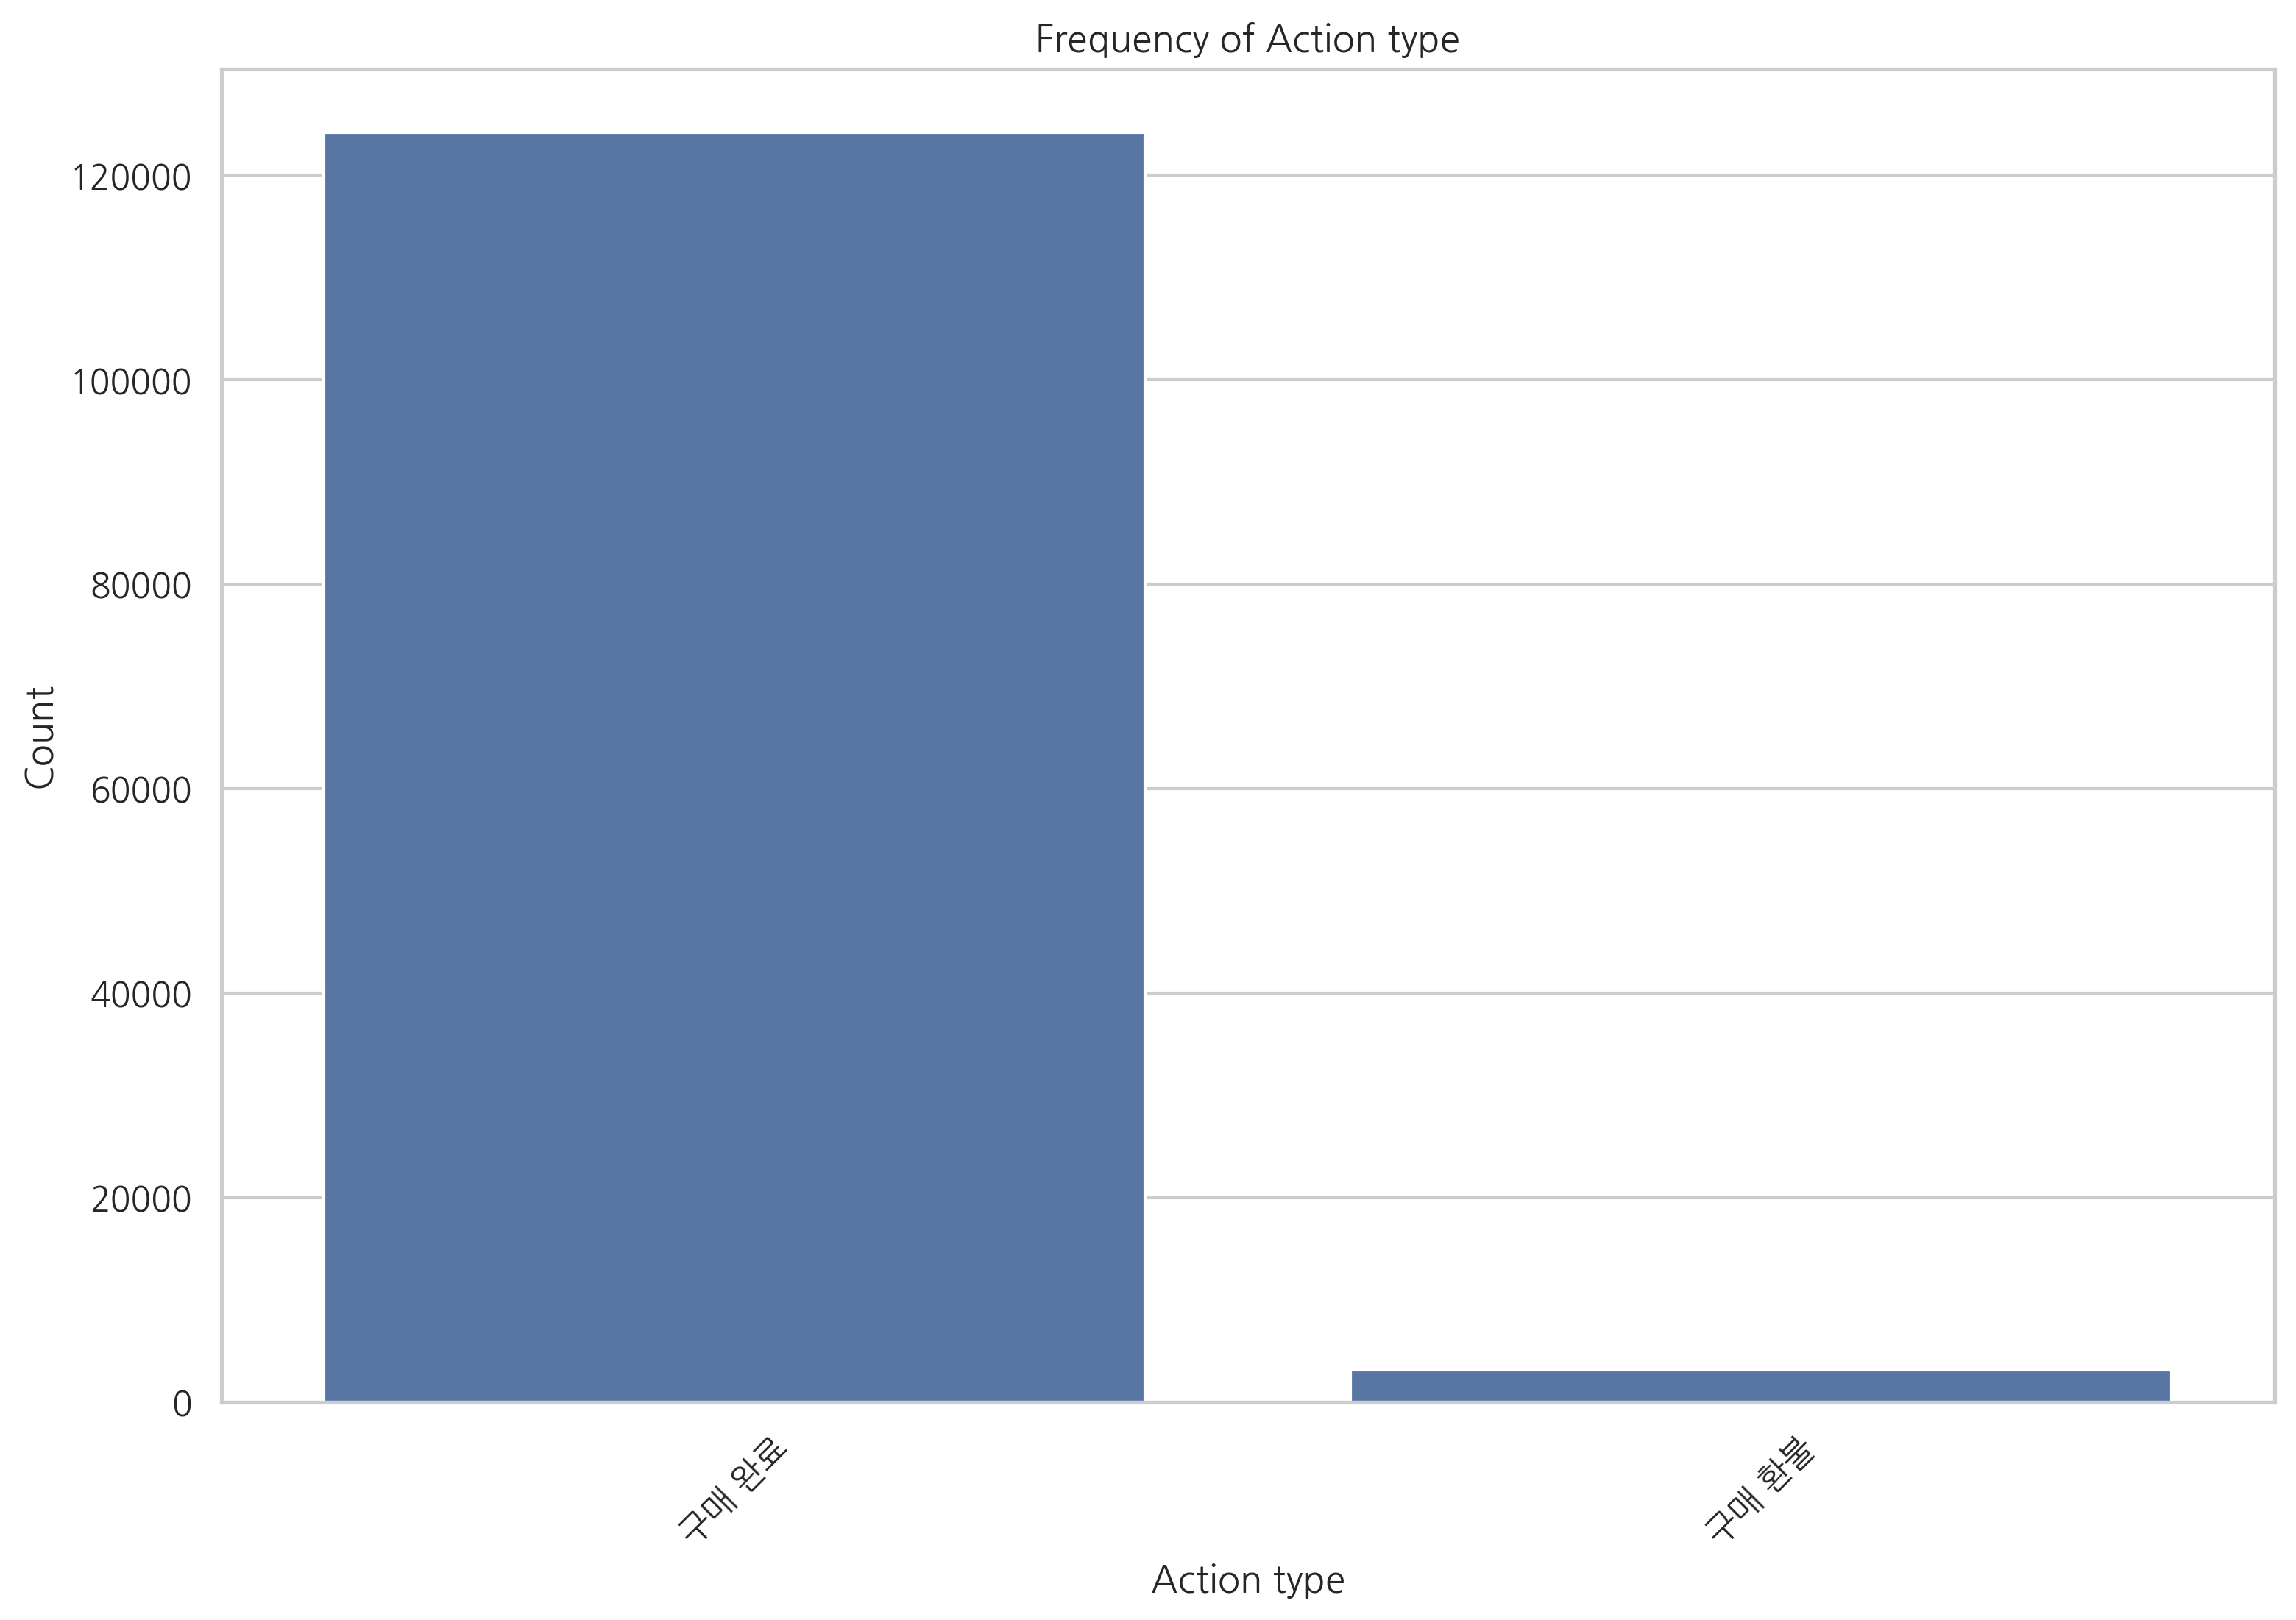

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x="action_type_str", data=df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Action type', fontsize=12)
plt.xticks(rotation=45)
plt.title('Frequency of Action type')

In [30]:
df_action['action_type_str'] = df_action.apply(lambda row: convert_str(row), axis=1)

Text(0.5, 1.0, 'Frequency of Action type')

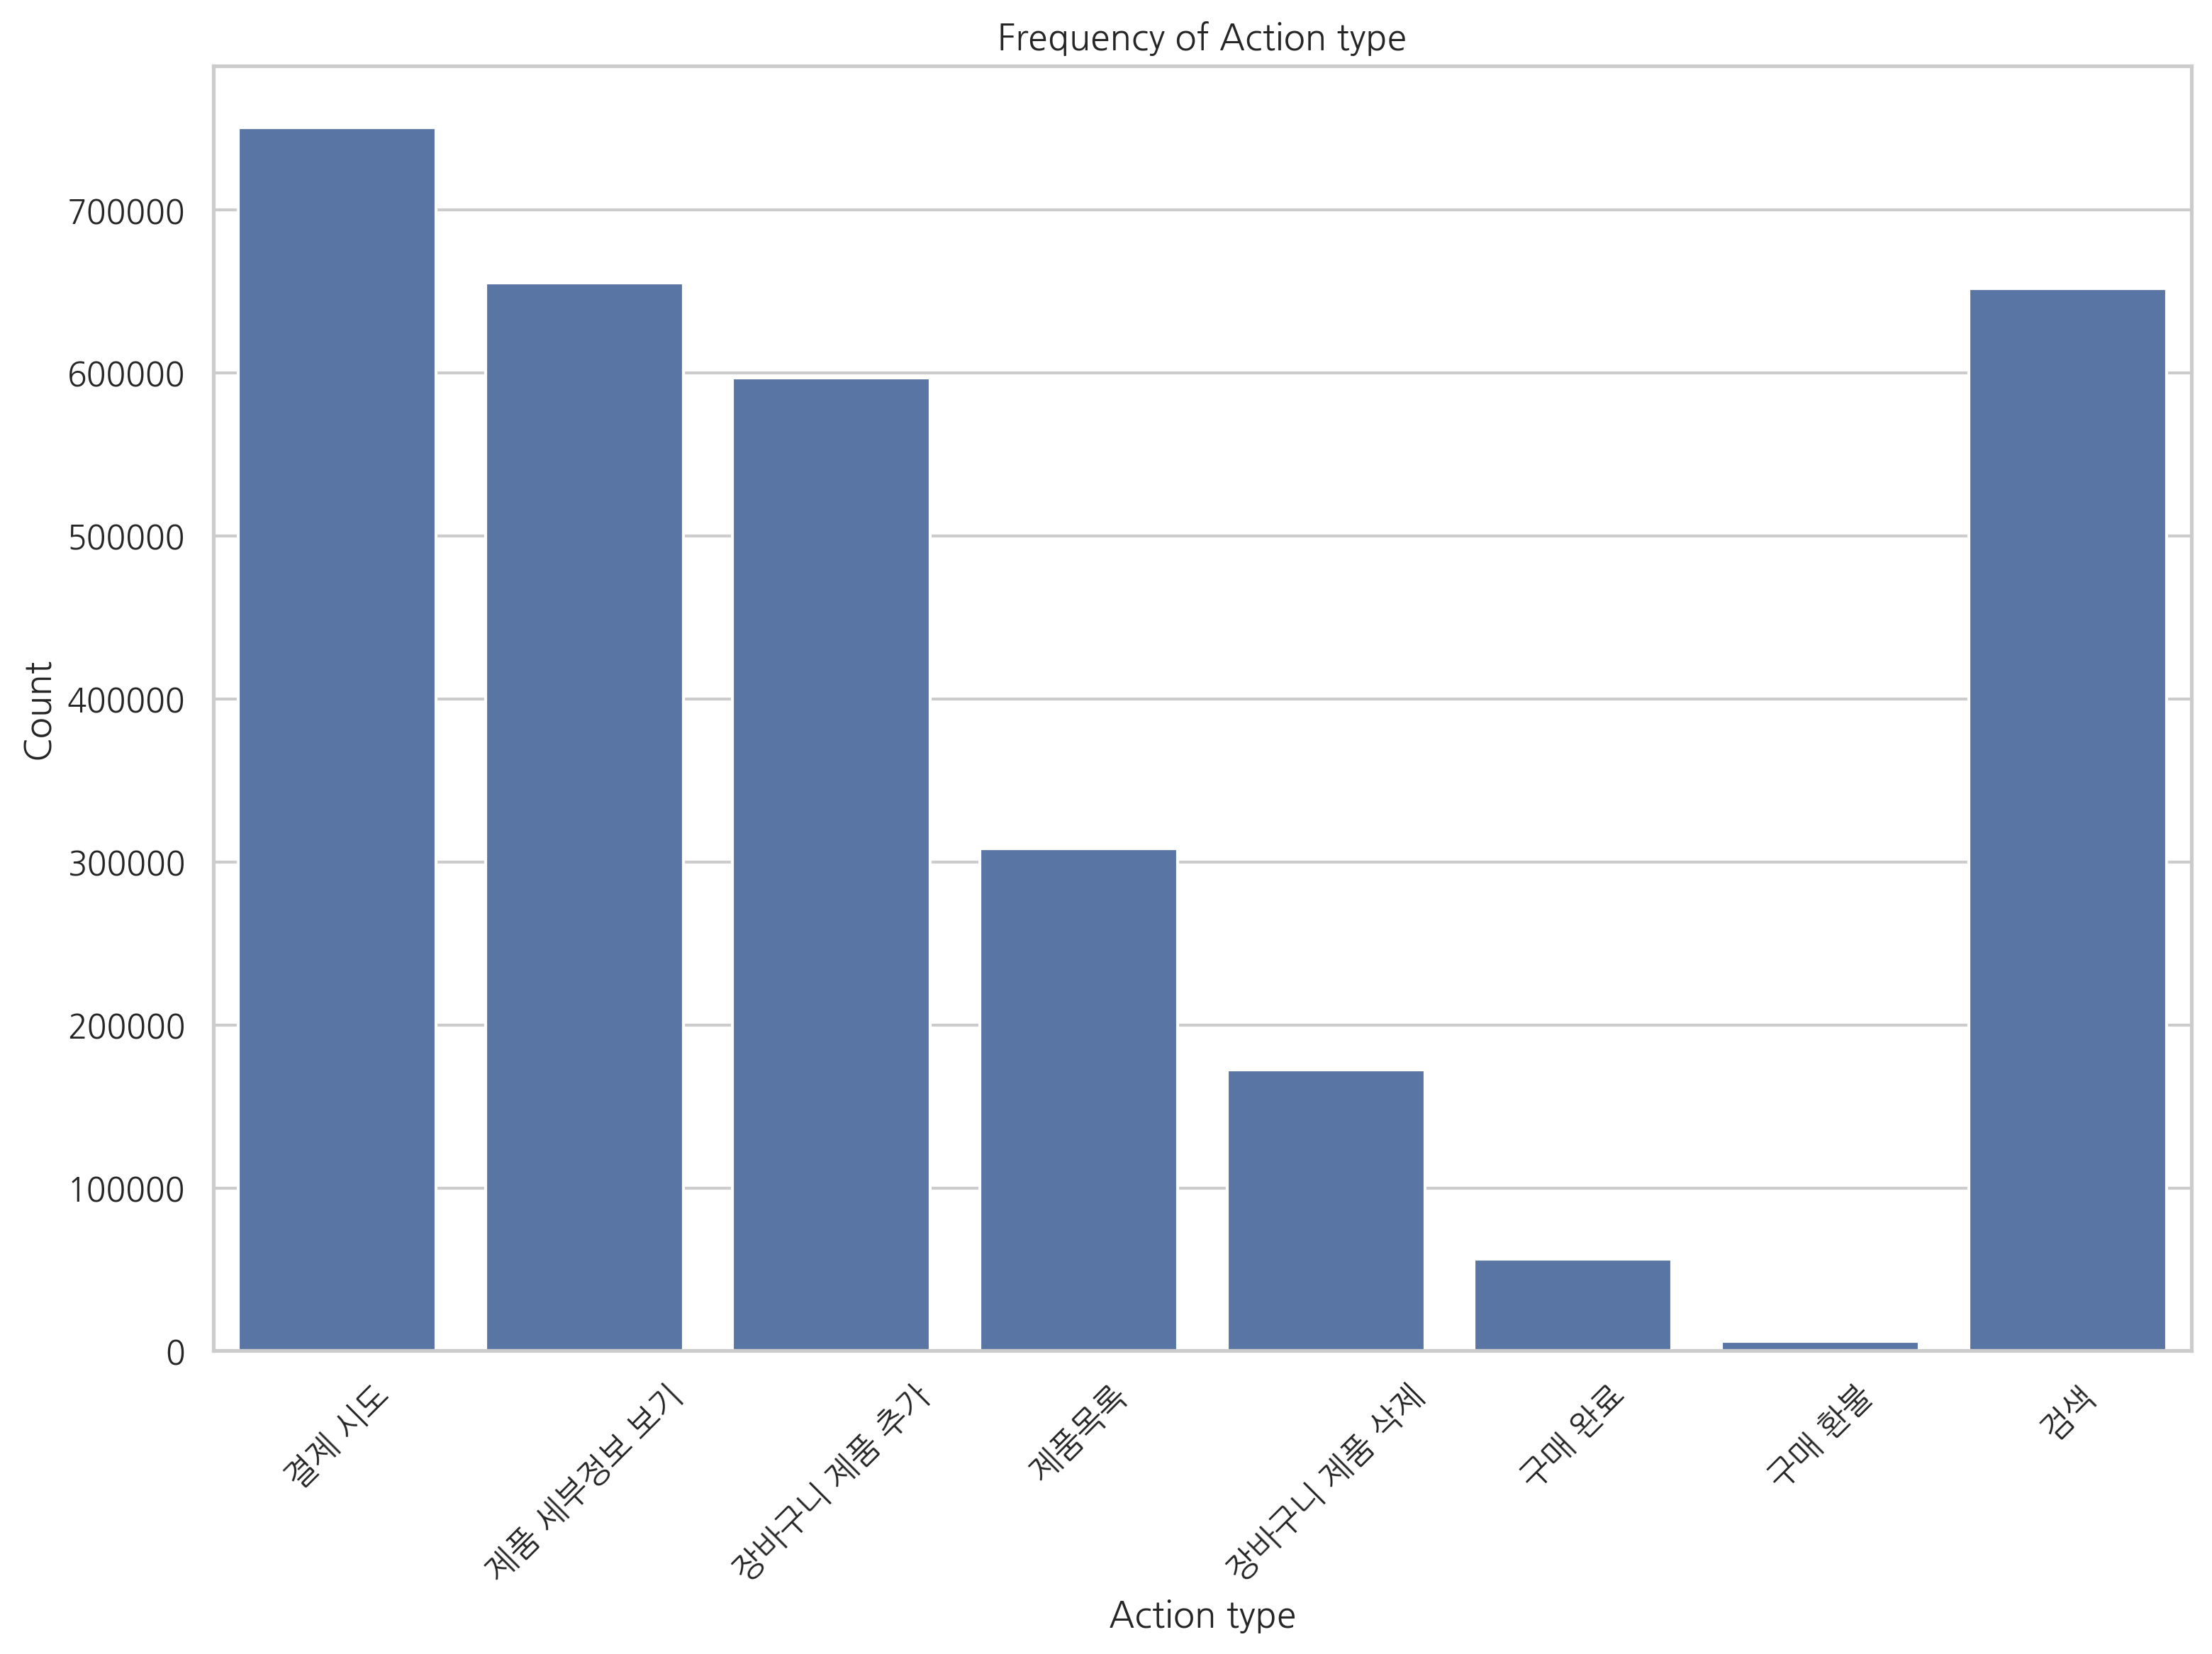

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x="action_type_str", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Action type', fontsize=12)
plt.xticks(rotation=45)
plt.title('Frequency of Action type')

Text(0.5, 1.0, '기기유형')

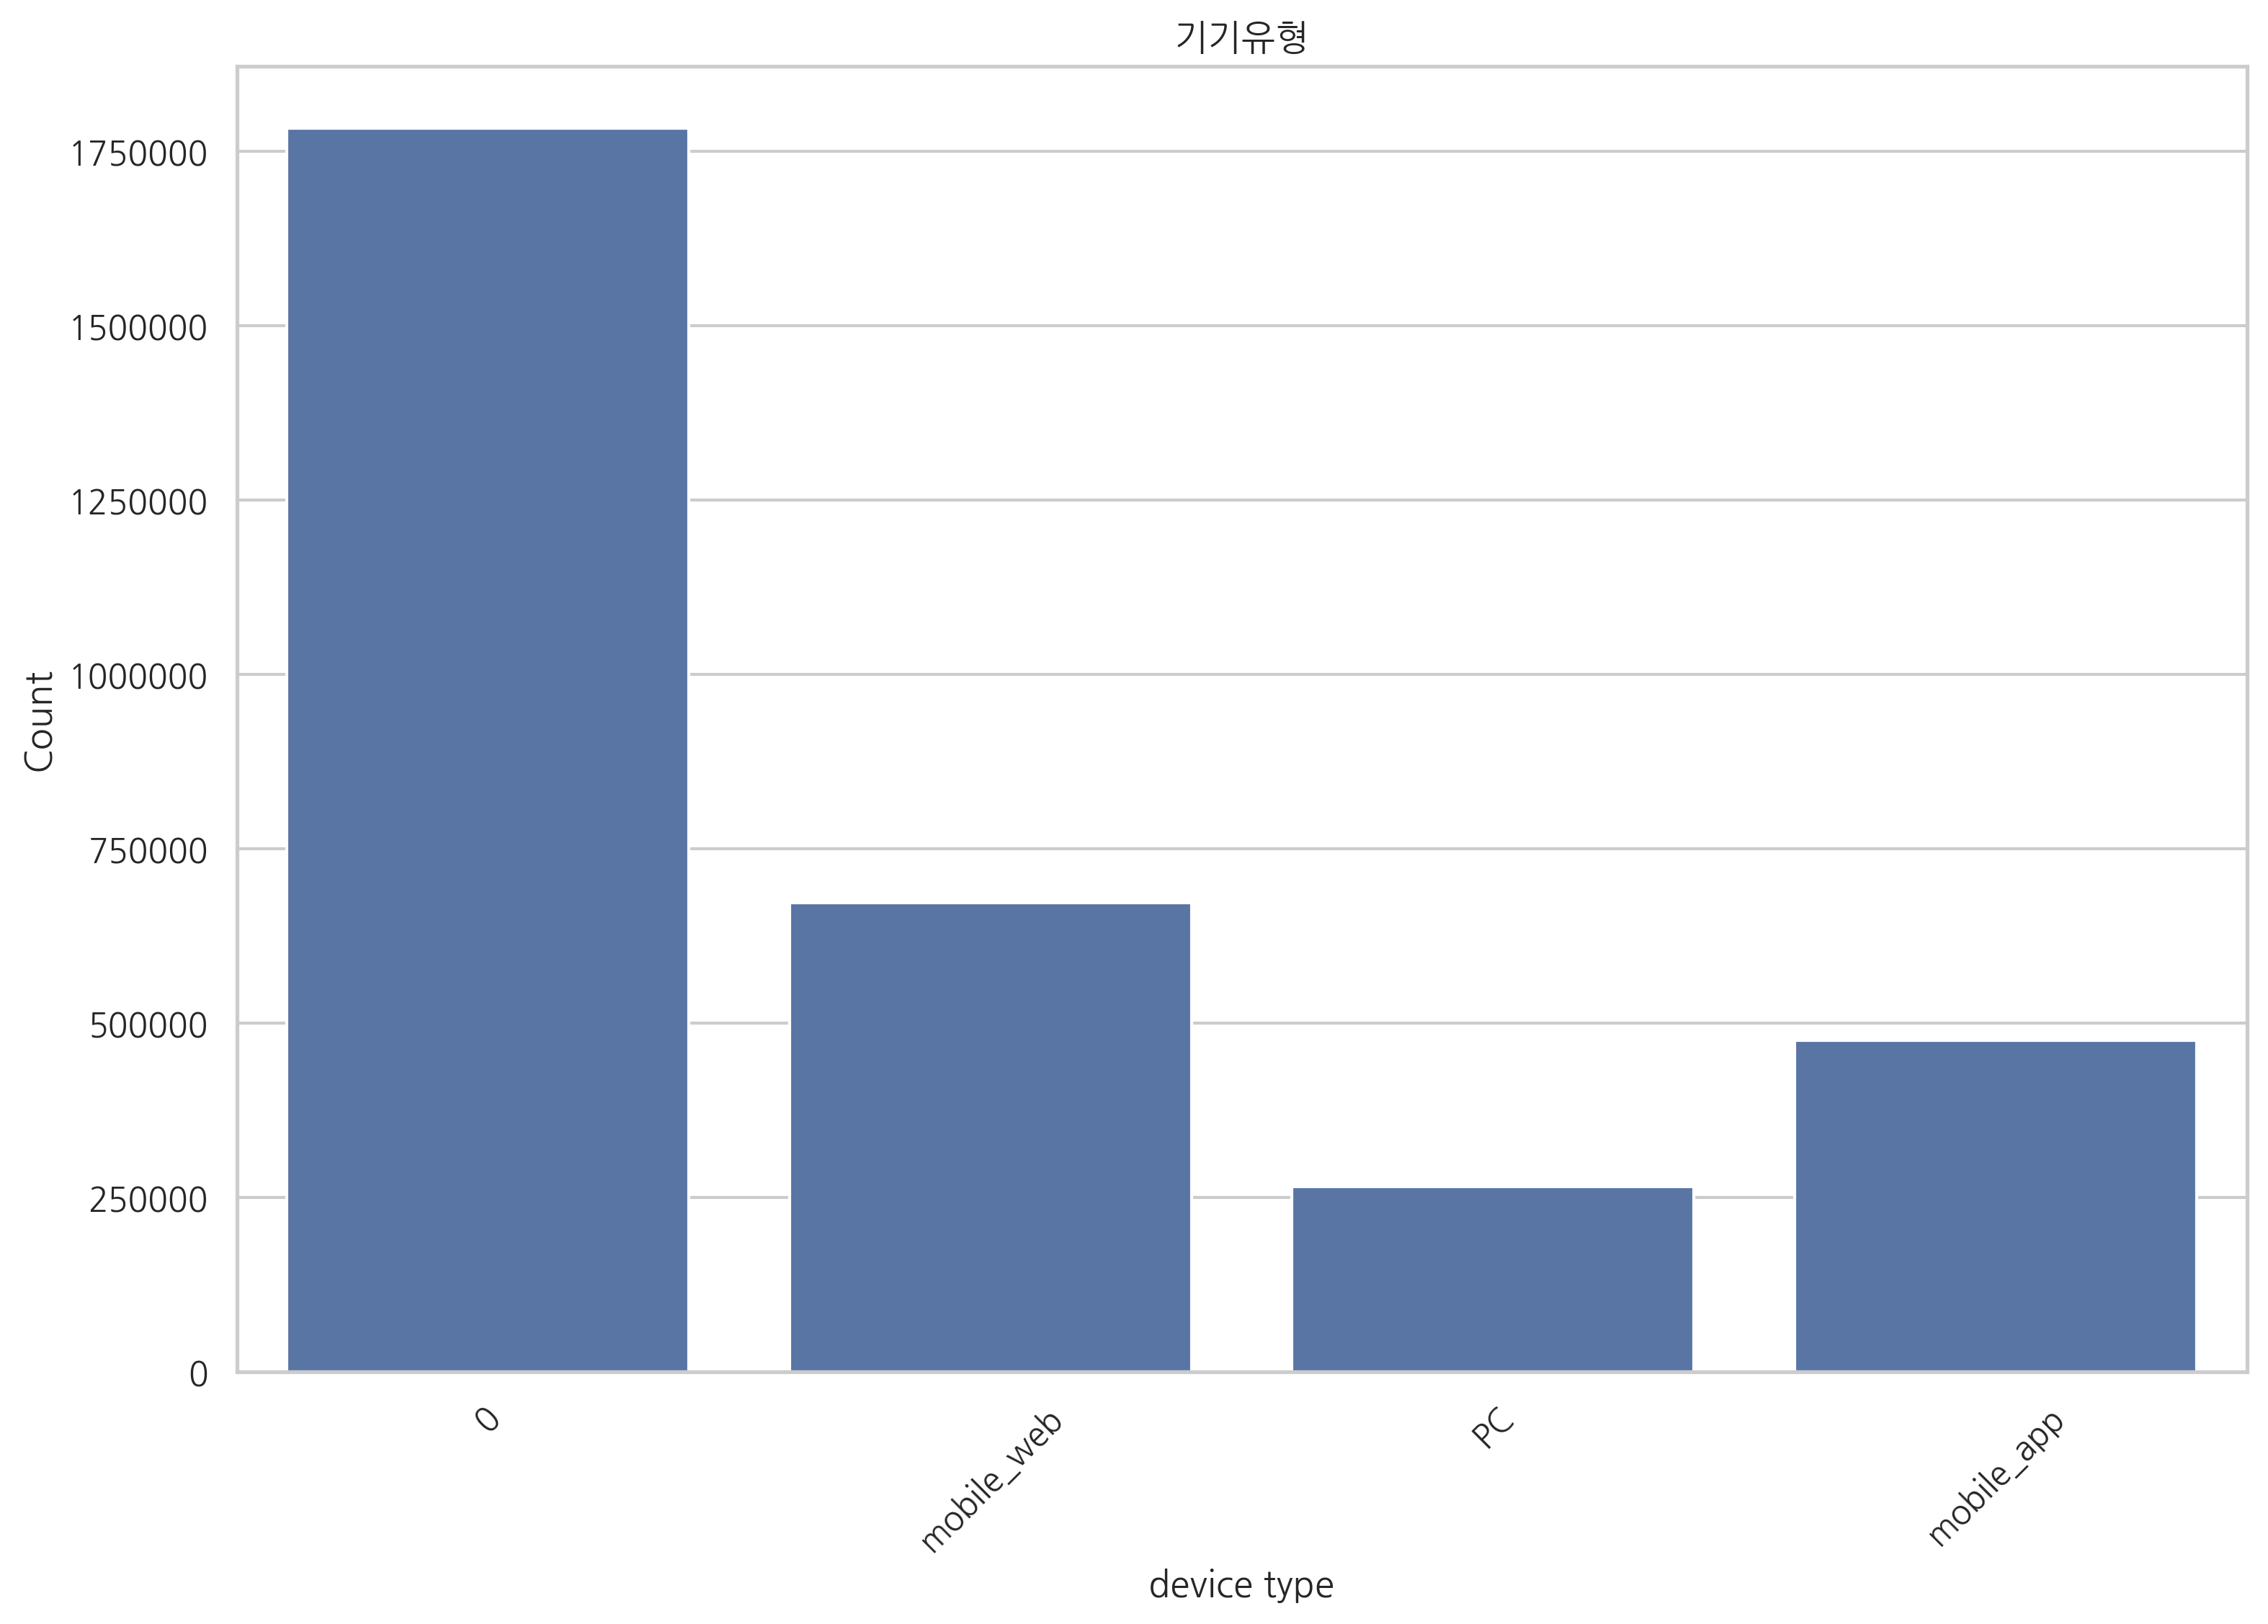

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x="dvc_ctg_nm", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('device type', fontsize=12)
plt.xticks(rotation=45)
plt.title('기기유형')

Text(0.5, 1.0, 'online or offline')

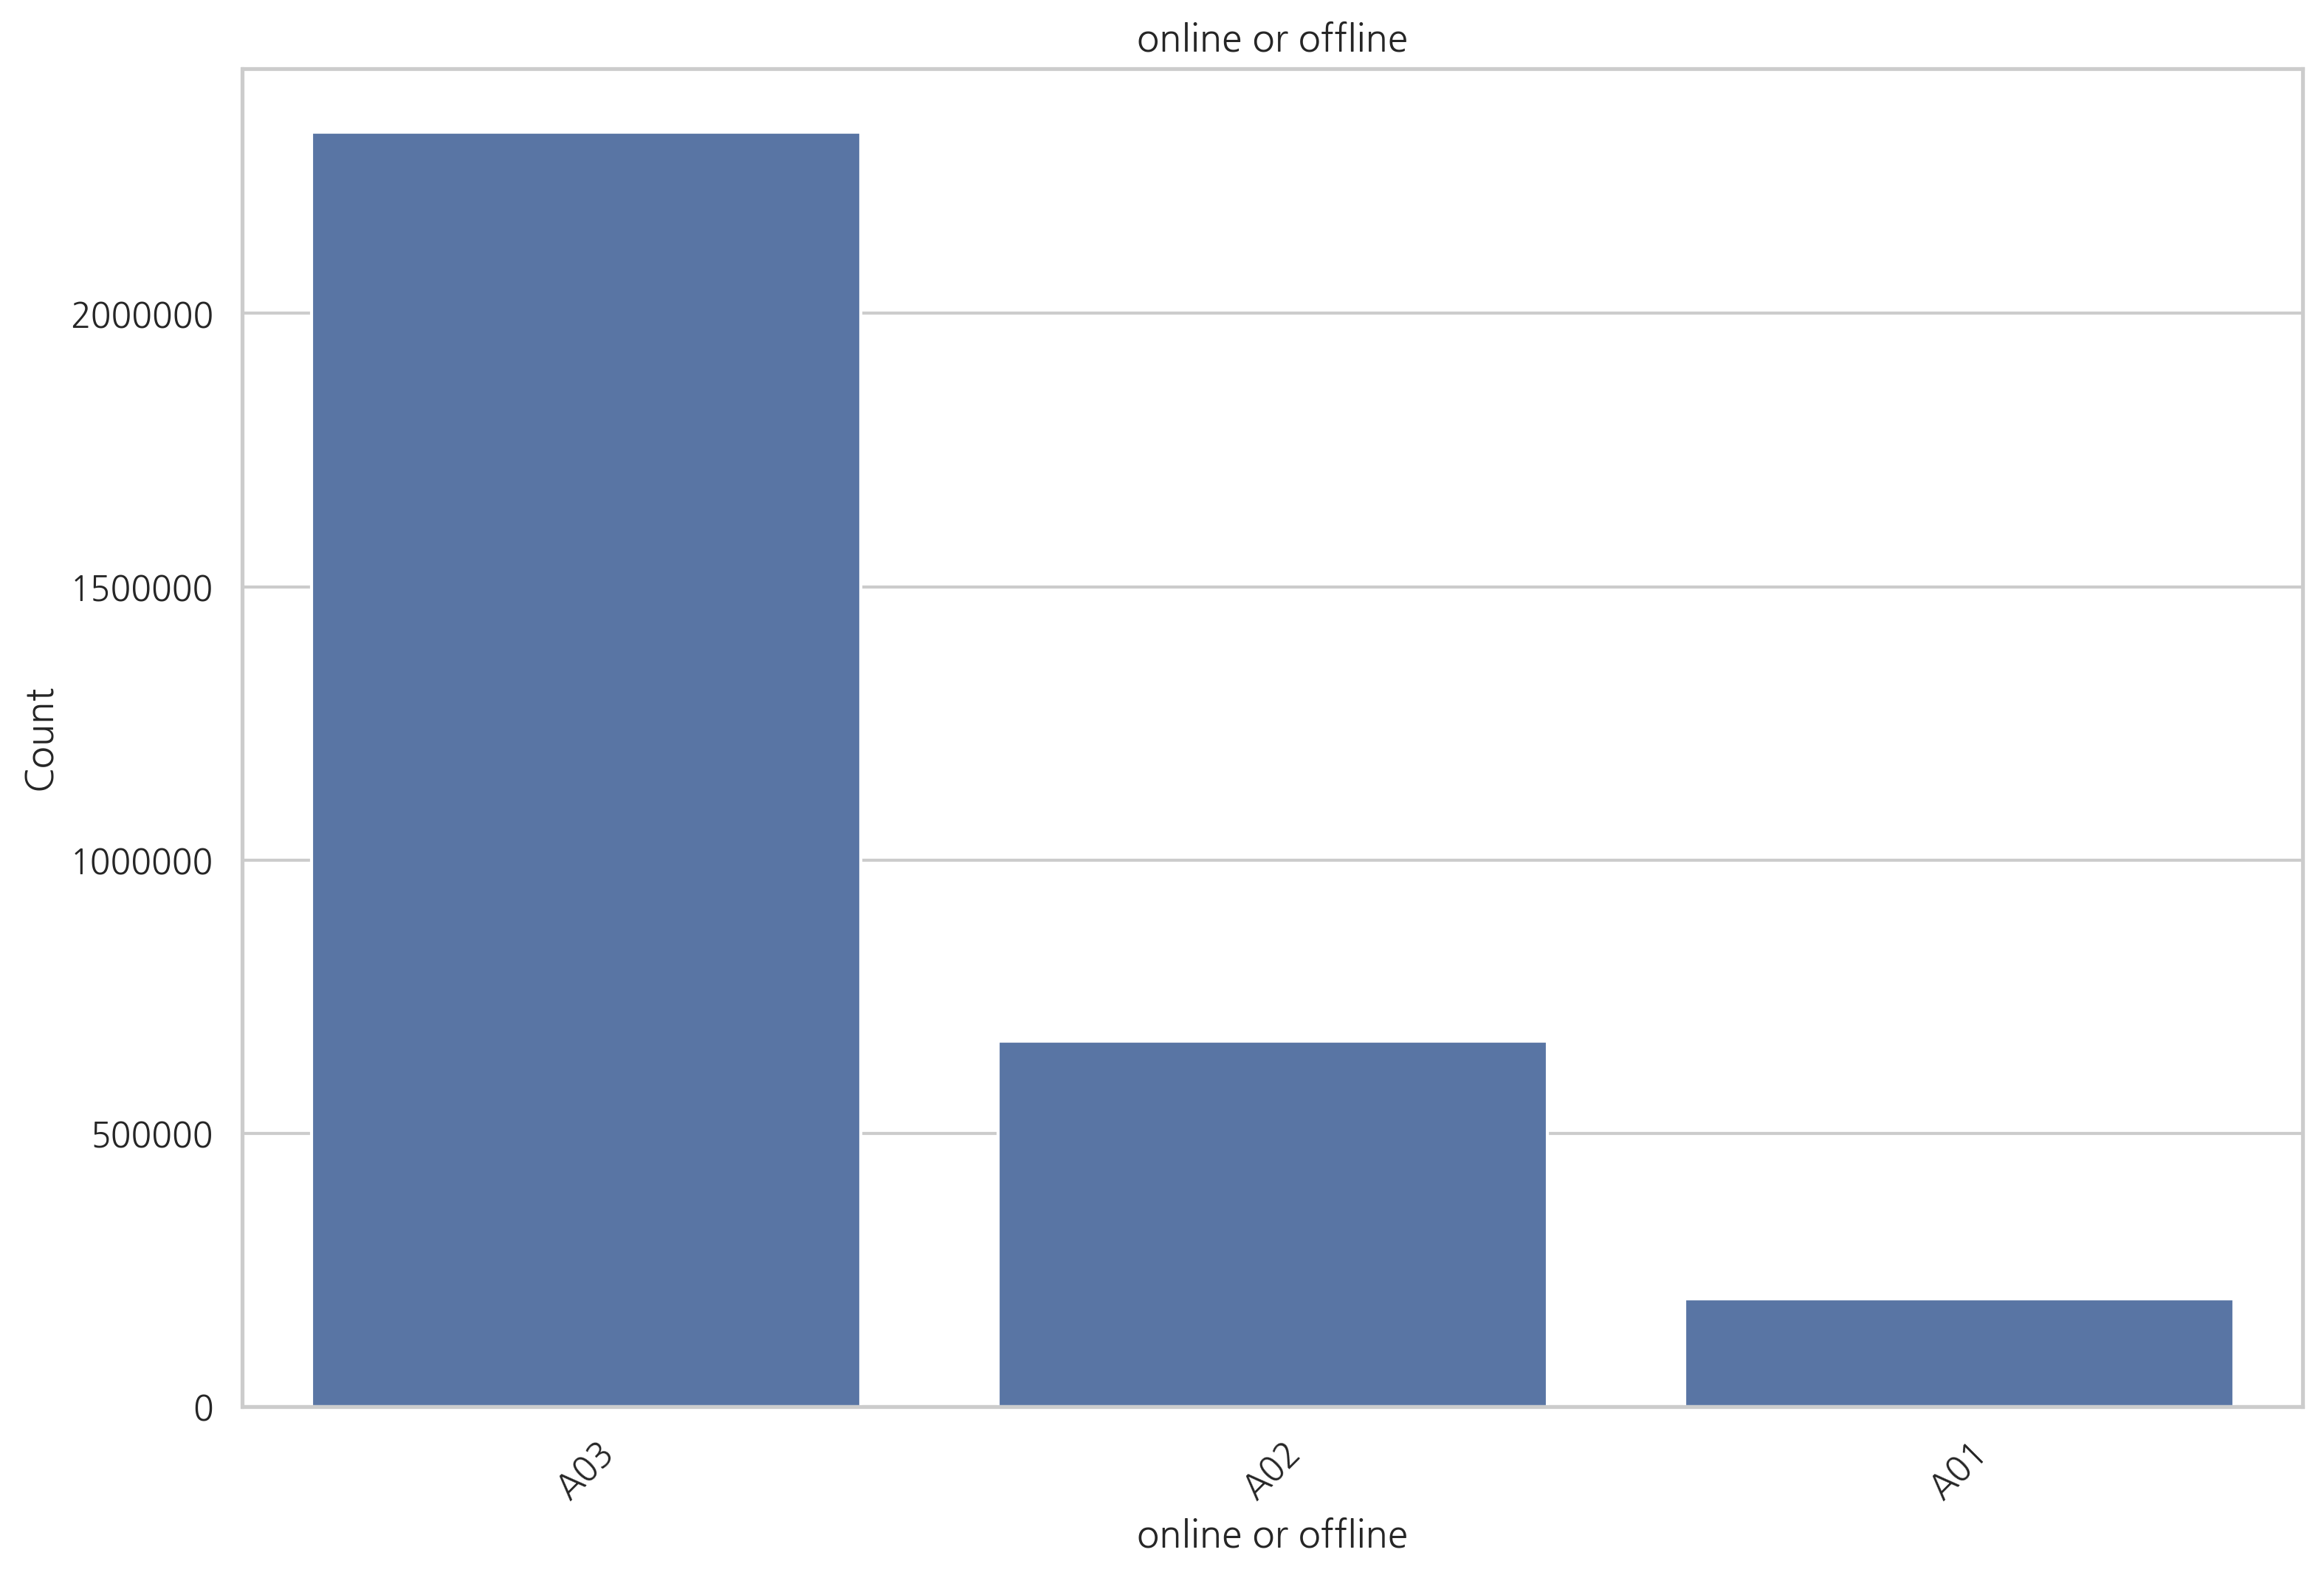

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x="biz_unit", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('online or offline', fontsize=12)
plt.xticks(rotation=45)
plt.title('online or offline')

Text(0.5, 1.0, 'online or offline')

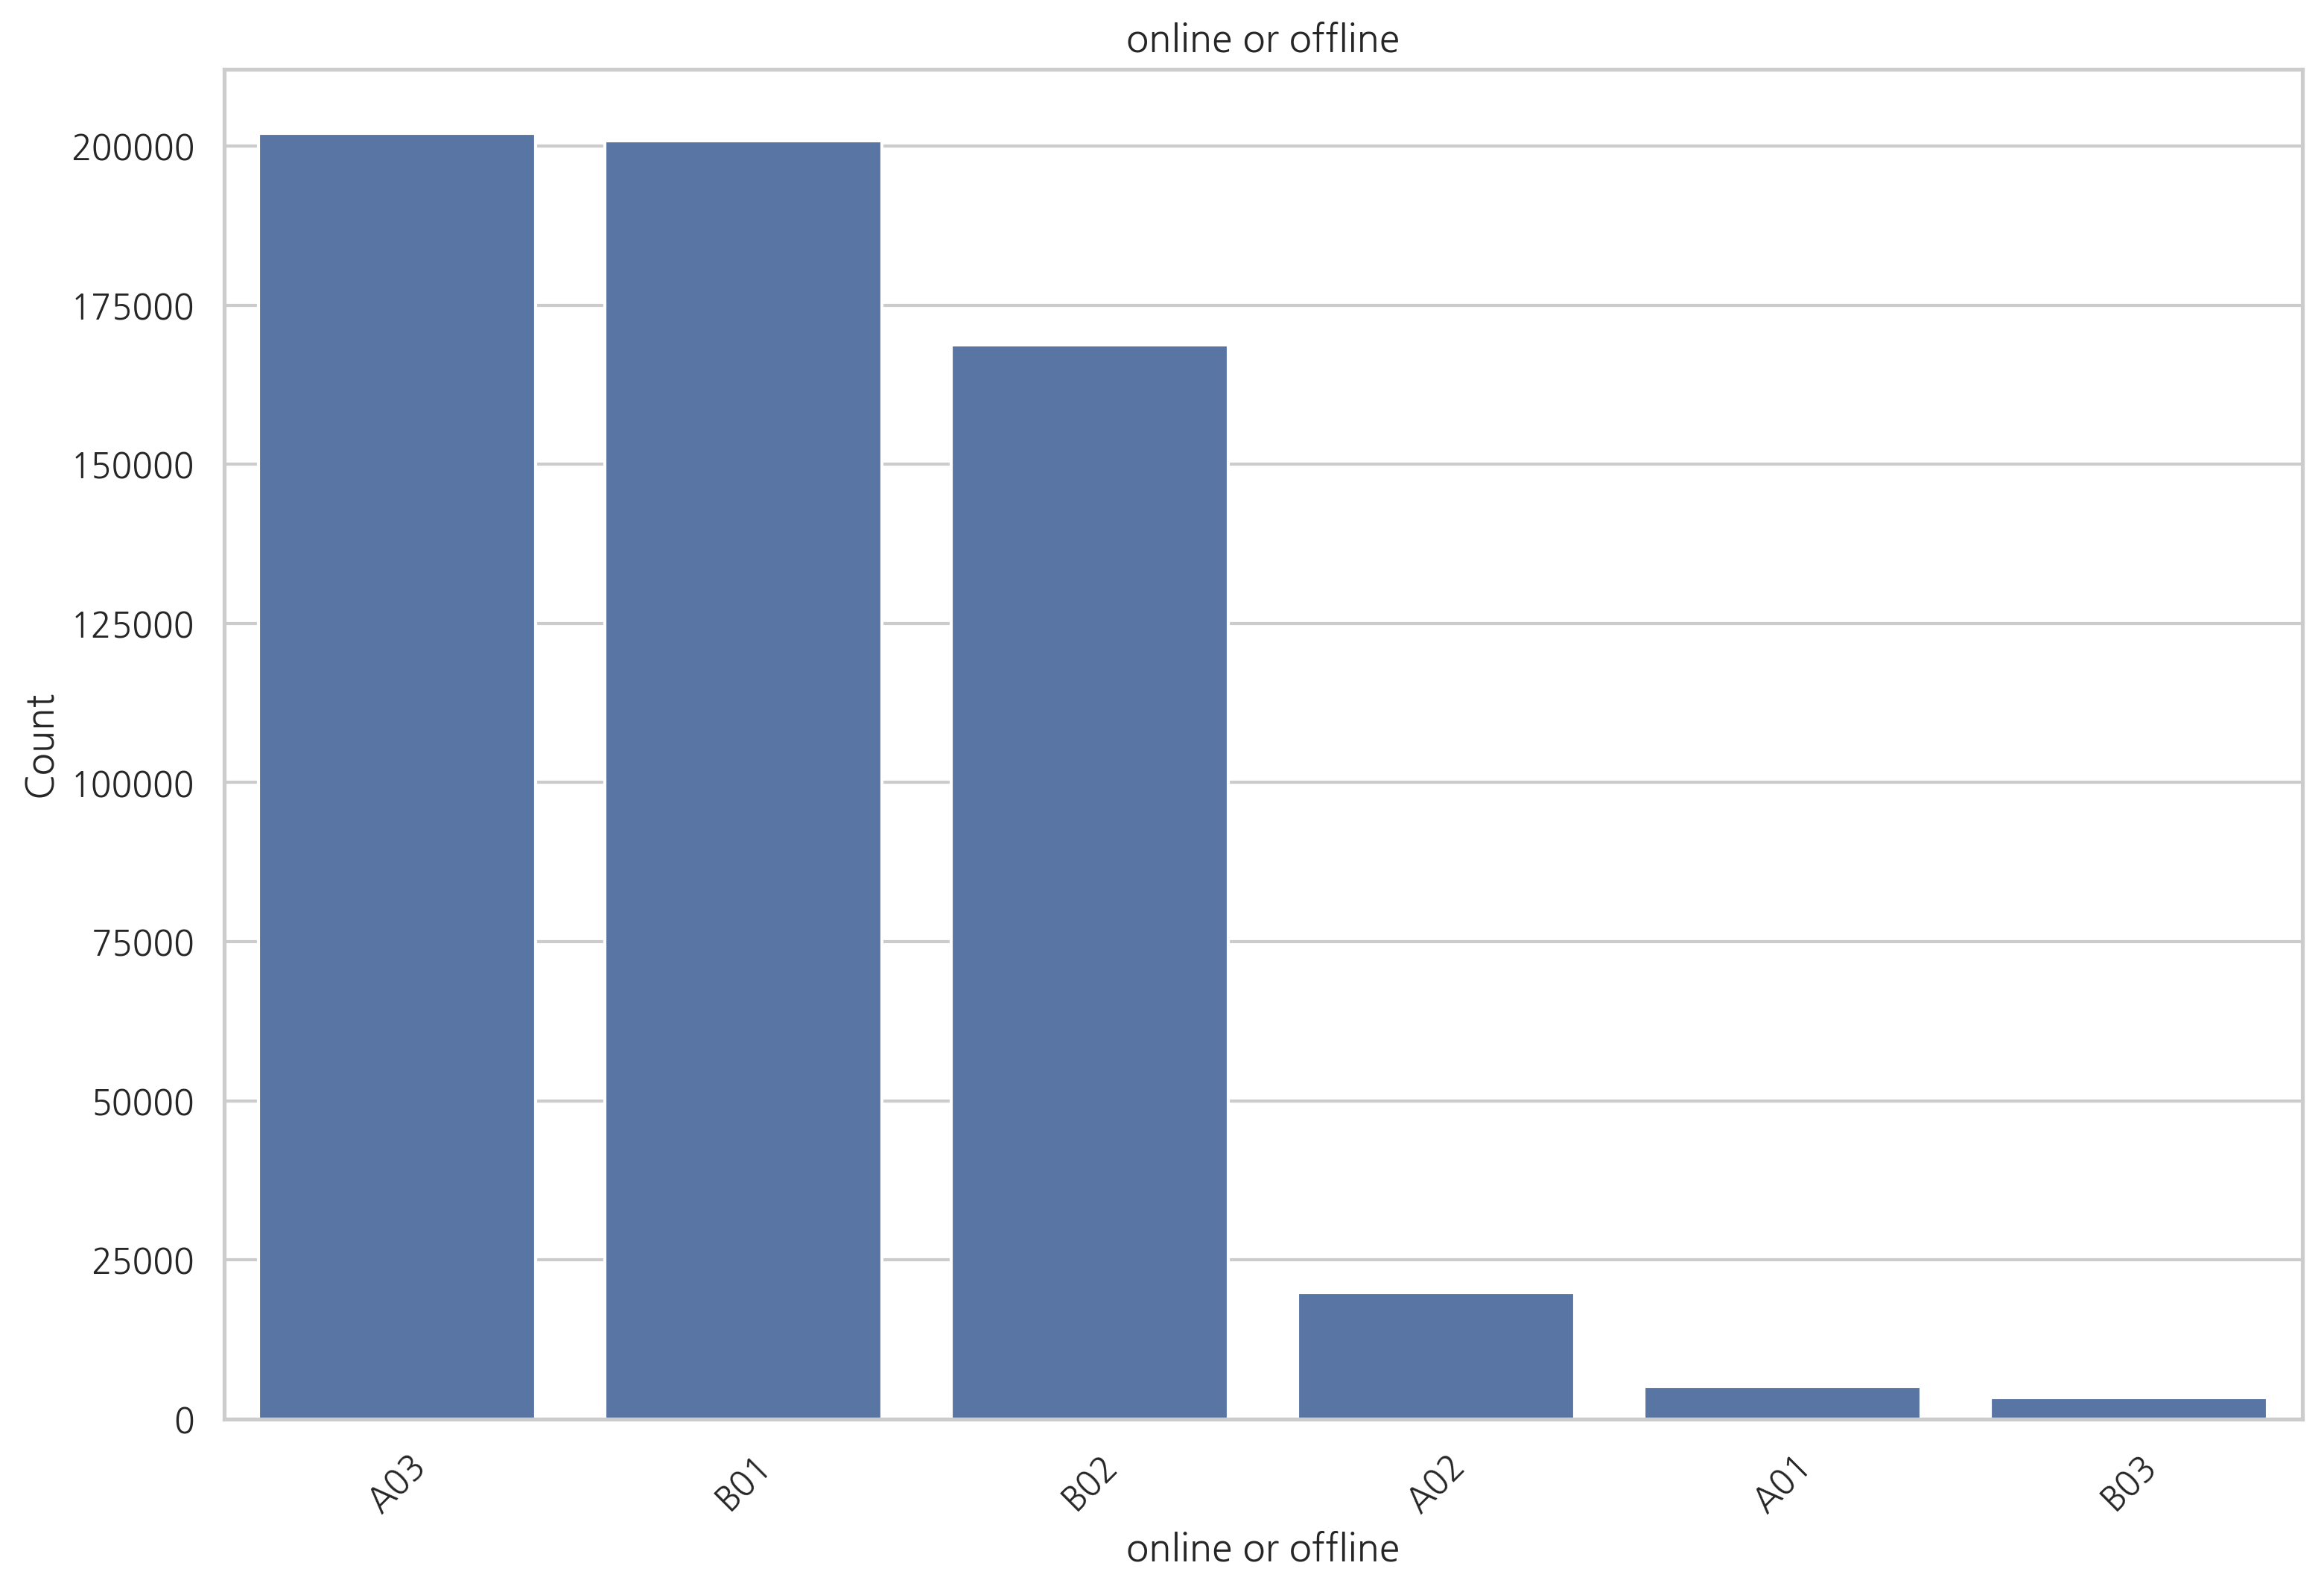

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="biz_unit", data=df_transaction, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('online or offline', fontsize=12)
plt.xticks(rotation=45)
plt.title('online or offline')

In [40]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 15 columns):
clnt_id            int64
sess_id            int64
hit_seq            int64
action_type        int64
biz_unit           object
sess_dt            datetime64[ns]
hit_tm             object
hit_pss_tm         int64
trans_id           int64
sech_kwd           object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src           object
dvc_ctg_nm         object
action_type_str    object
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 365.8+ MB


In [41]:
df_action['sess_dt']

0         2019-09-13
1         2019-09-13
2         2019-09-13
3         2019-09-13
4         2019-09-13
             ...    
3196357   2019-08-15
3196358   2019-07-21
3196359   2019-07-21
3196360   2019-07-31
3196361   2019-08-18
Name: sess_dt, Length: 3196362, dtype: datetime64[ns]

In [56]:
df_time = df.set_index('sess_dt')

In [57]:
df_time.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,action_type_str
sess_dt,,,,,,,,,,,,,,,,,,,,,,,
2019-07-16,28304,1,22,6,A03,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,6,1568,2019-07-16,11:41,1000,1,Vegetables,Fruit Vegetables,Eggplants,구매 완료
2019-07-16,28304,1,22,6,A03,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,7,1583,2019-07-16,11:41,1000,1,Vegetables,Leaf Vegetables,Korean Lettuces,구매 완료
2019-07-16,28304,1,22,6,A03,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,5,1625,2019-07-16,11:41,1290,1,Vegetables,Western Vegetables,Lettuces,구매 완료
2019-07-16,28304,1,22,6,A03,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,8,1394,2019-07-16,11:41,100,1,Substitute Foods,Instant Noodles,Bibim Ramens,구매 완료
2019-07-16,28304,1,22,6,A03,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,1,0515,2019-07-16,11:41,7980,1,Frozen Foods,Frozen Instant Foods,Frozen Dumplings,구매 완료


In [58]:
df_time.index.is_unique

False

In [59]:
df_time.sort_values(by='sess_dt',ascending=True).head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,action_type_str
sess_dt,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,61719,1,23,6,A03,11:33,2626964,38980,0,55.0,3044.0,DIRECT,0,1,0970,2019-07-01,11:33,5950,1,Meats,Imported Porks,Imported Porks - Shoulder Butts,구매 완료
2019-07-01,35265,1,20,6,A03,11:19,772413,38971,0,24.0,779.0,DIRECT,0,6,0374,2019-07-01,11:19,8990,1,Detergents / Hygiene Goods,Laundry Detergents,Laundry Detergent Liquids,구매 완료
2019-07-01,35265,1,20,6,A03,11:19,772413,38971,0,24.0,779.0,DIRECT,0,5,0964,2019-07-01,11:19,3990,1,Meats,Eggs,Chicken Eggs,구매 완료
2019-07-01,35265,1,20,6,A03,11:19,772413,38971,0,24.0,779.0,DIRECT,0,4,0565,2019-07-01,11:19,3990,1,Fruits,Imported Fruits,Bananas,구매 완료
2019-07-01,67966,1,20,6,A03,09:31,573425,38918,0,31.0,573.0,DIRECT,PC,2,0861,2019-07-01,09:31,13900,1,Kitchenware,Disposable Kitchenware,Disposable Paper Cups,구매 완료


In [60]:
df_time_month = df_time.resample('BM').mean()

In [61]:
df_time_month.head()

,clnt_id,sess_id,hit_seq,action_type,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trans_seq,buy_am,buy_ct
sess_dt,,,,,,,,,,,
2019-07-31,37775.952098,7.759060,35.192071,6.024951,1.510025e+06,51919.067801,44.739886,1692.287656,4.808895,1.398350e+04,1.307621
2019-08-30,38103.878181,19.201164,36.886021,6.020371,1.591242e+06,76632.032782,45.520083,1783.146255,5.033022,2.419165e+06,1.347708
2019-09-30,38109.611478,31.103652,36.809789,6.029391,1.589583e+06,100993.846435,45.463528,1764.795205,4.922335,2.499295e+06,1.305366


In [62]:
(df_time.index.max() - df_time.index.min()).days

91

In [63]:
len(df_time_month.index)

3

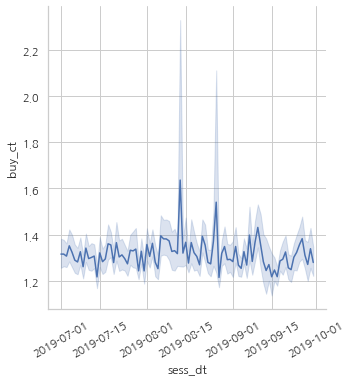

In [69]:
g = sns.relplot(x="sess_dt", y="buy_ct", kind="line", data=df)
g.set_xticklabels(rotation=30)
plt.show()

In [65]:
df['sess_dt'].unique()

array(['2019-07-16T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-09-09T00:00:00.000000000',
       '2019-07-03T00:00:00.000000000', '2019-07-22T00:00:00.000000000',
       '2019-08-28T00:00:00.000000000', '2019-07-25T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-07-30T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-09-12T00:00:00.000000000', '2019-08-25T00:00:00.000000000',
       '2019-09-07T00:00:00.000000000', '2019-07-27T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-09-18T00:00:00.000000000', '2019-07-10T00:00:00.000000000',
       '2019-07-06T00:00:00.000000000', '2019-07-31T00:00:00.000000000',
       '2019-09-02T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-07-20T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-09-04T00:00:00.000000000', '2019-07-01